In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pylab as plt


In [3]:
df = pd.read_csv('feature_time_48k_2048_load_1.csv')
df

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1
...,...,...,...,...,...,...,...,...,...,...
2295,0.21425,-0.19839,0.010769,0.064100,0.064983,-0.212497,-0.119312,3.297037,6.034174,Normal_1
2296,0.21967,-0.20882,0.013136,0.068654,0.069883,-0.061308,-0.295122,3.143410,5.319958,Normal_1
2297,0.20799,-0.21613,0.012571,0.067128,0.068279,-0.154754,-0.071405,3.046161,5.431299,Normal_1
2298,0.21425,-0.22405,0.012608,0.066813,0.067977,-0.326966,0.023662,3.151821,5.391672,Normal_1


In [4]:
df['fault'].unique()

array(['Ball_007_1', 'Ball_014_1', 'Ball_021_1', 'IR_007_1', 'IR_014_1',
       'IR_021_1', 'OR_007_6_1', 'OR_014_6_1', 'OR_021_6_1', 'Normal_1'],
      dtype=object)

In [5]:
df.isnull().values.any()

False

In [6]:
df['fault'] = pd.Categorical(df['fault']).codes
df.head

<bound method NDFrame.head of           max      min      mean        sd       rms  skewness  kurtosis  \
0     0.35986 -0.41890  0.017840  0.122746  0.124006 -0.118571 -0.042219   
1     0.46772 -0.36111  0.022255  0.132488  0.134312  0.174699 -0.081548   
2     0.46855 -0.43809  0.020470  0.149651  0.151008  0.040339 -0.274069   
3     0.58475 -0.54303  0.020960  0.157067  0.158422 -0.023266  0.134692   
4     0.44685 -0.57891  0.022167  0.138189  0.139922 -0.081534  0.402783   
...       ...      ...       ...       ...       ...       ...       ...   
2295  0.21425 -0.19839  0.010769  0.064100  0.064983 -0.212497 -0.119312   
2296  0.21967 -0.20882  0.013136  0.068654  0.069883 -0.061308 -0.295122   
2297  0.20799 -0.21613  0.012571  0.067128  0.068279 -0.154754 -0.071405   
2298  0.21425 -0.22405  0.012608  0.066813  0.067977 -0.326966  0.023662   
2299  0.19610 -0.24721  0.012209  0.063243  0.064396 -0.351762  0.226294   

         crest      form  fault  
0     2.901946  6.95085

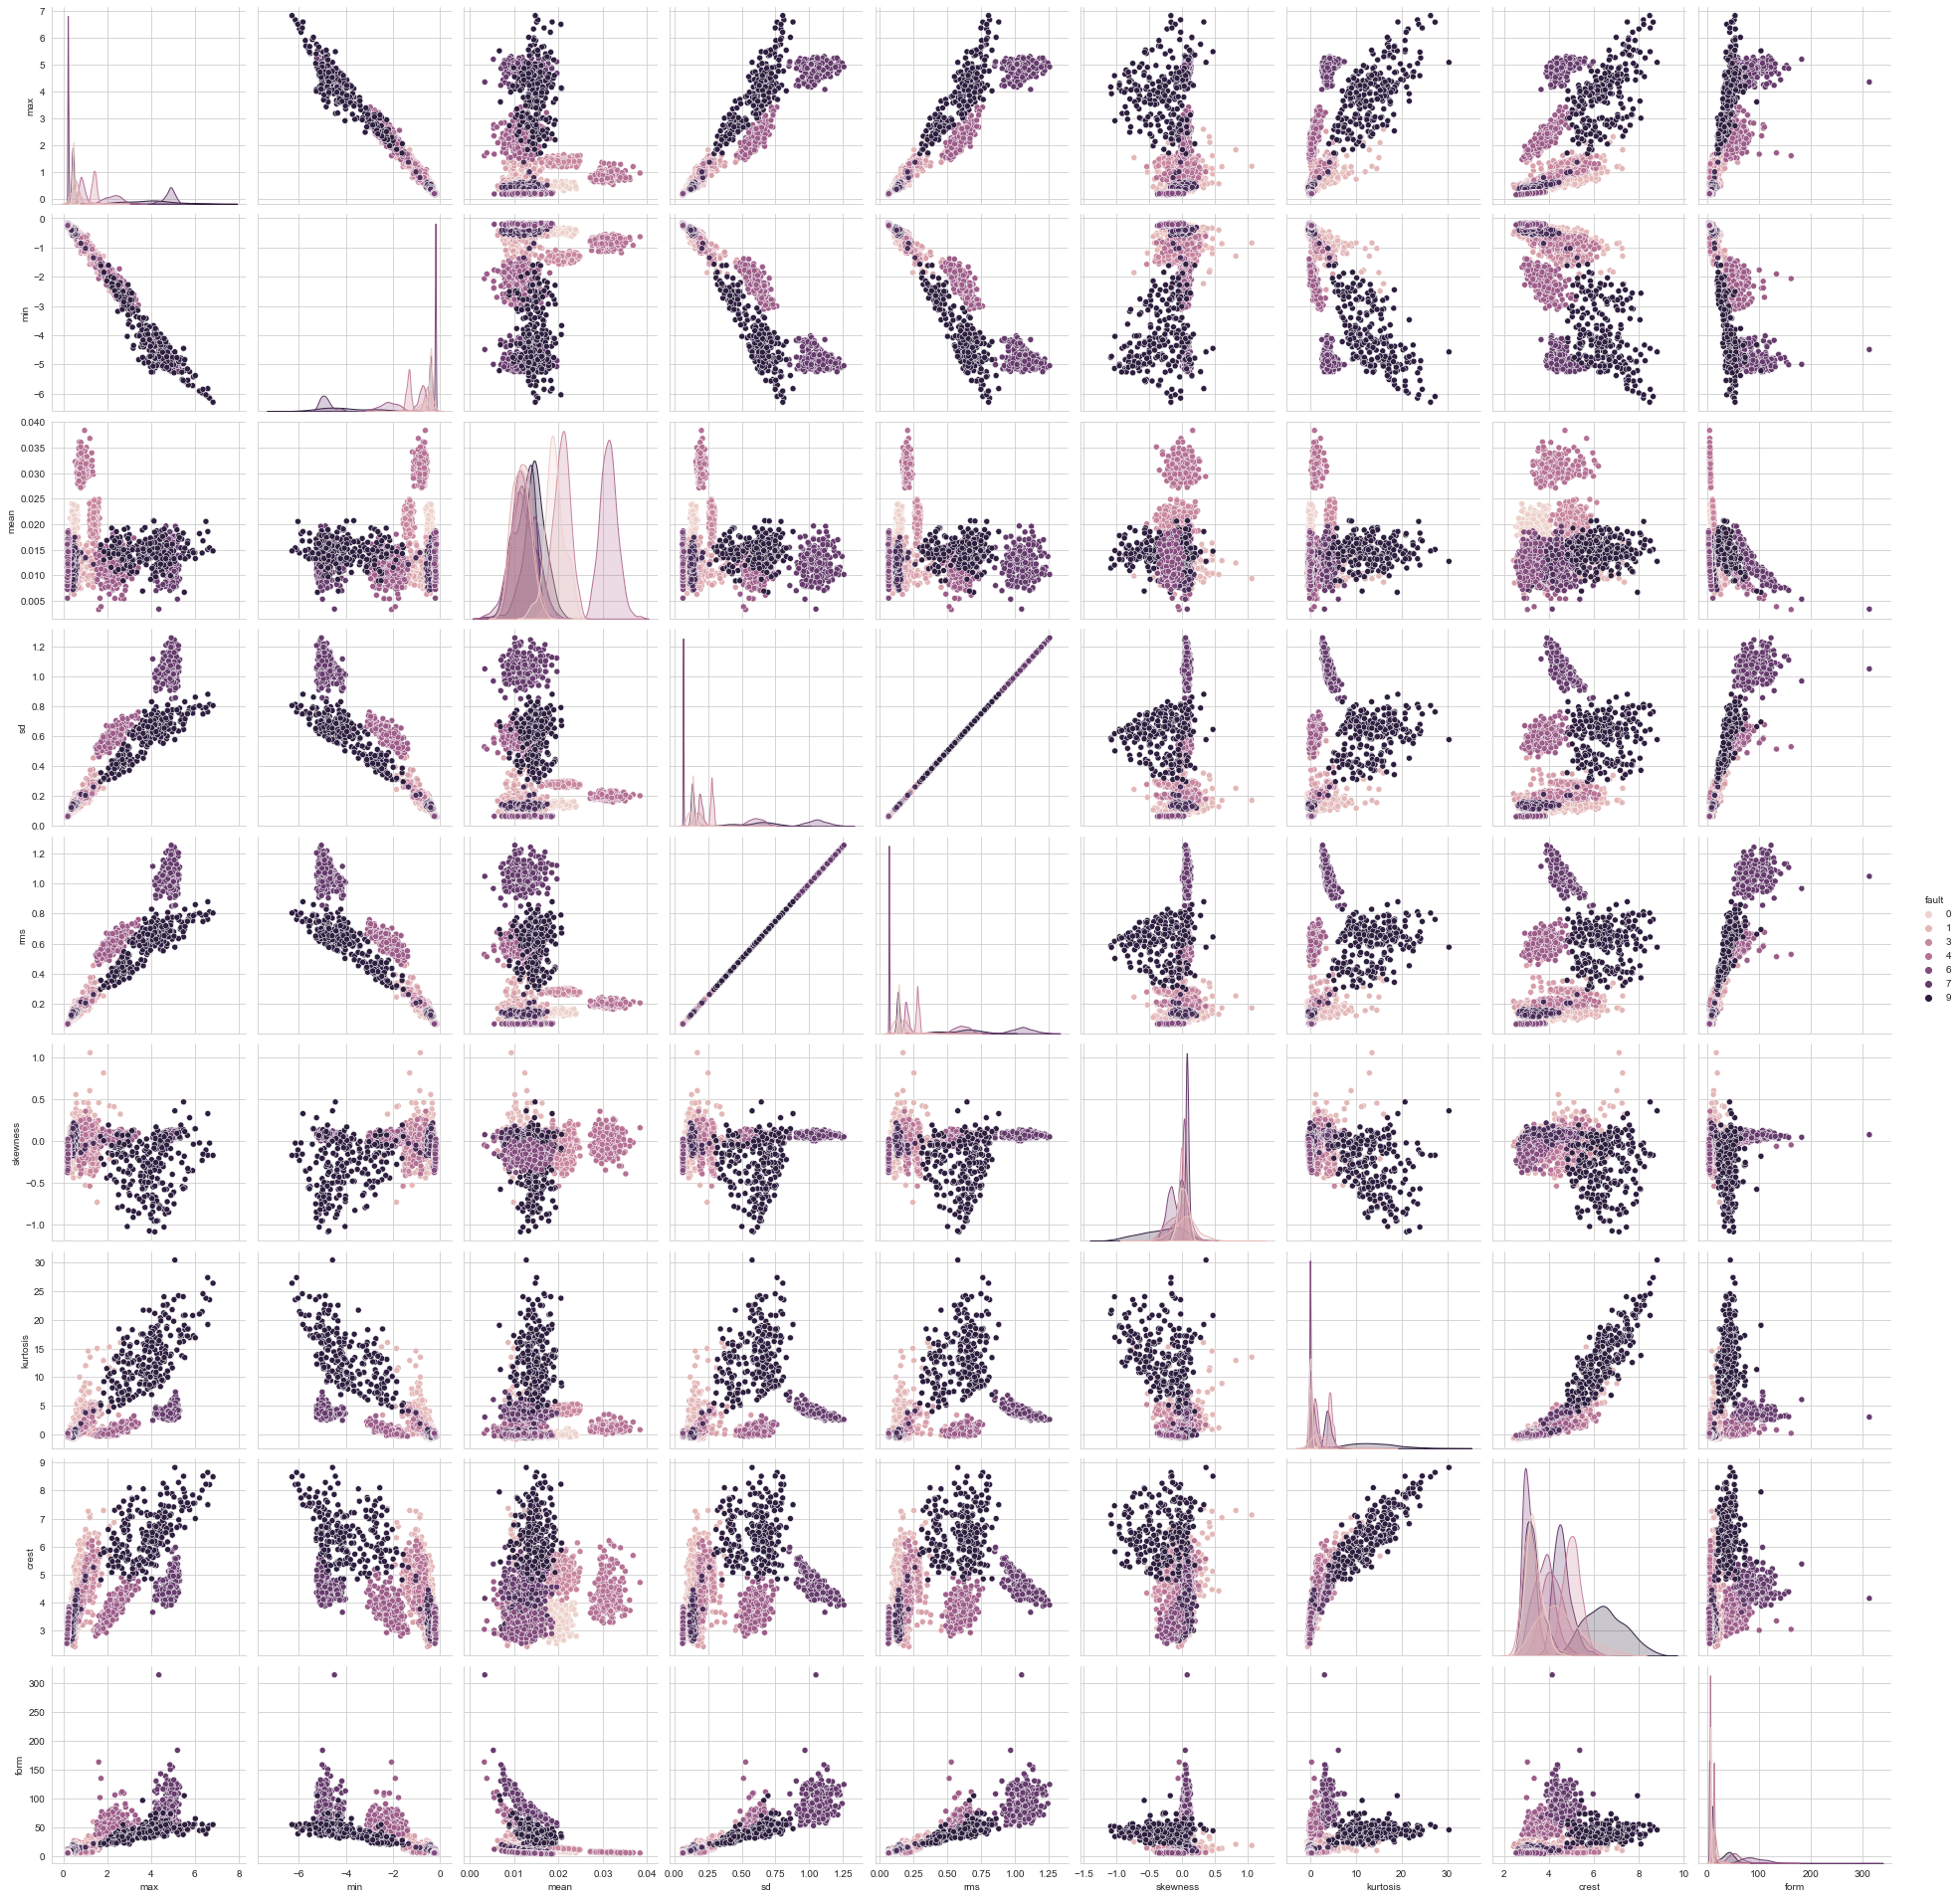

In [17]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(df, hue="fault", height=3)
plt.show()

C:\Users\Kamran\anaconda3\envs\sum_int\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


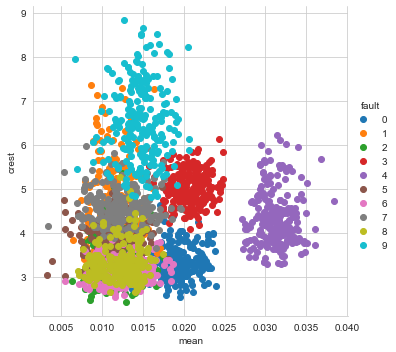

In [8]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue='fault', size=5)\
.map(plt.scatter, "mean", "crest")\
.add_legend()
plt.show()

In [9]:
x_data = df.drop(['fault'],axis=1)
y_data = df['fault']
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=['min', 'max', 'mean', 'sd','rms','skewness','curtosis','form','crest'])
df.head()

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,0
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,0
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,0
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,0
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:",result1)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[38  0  0  0  0  0  0  0  2  0]
 [ 2 34  0  0  0  0  4  0  4  2]
 [ 0  1 37  0  0  5  0  0  1  1]
 [ 0  0  0 40  0  0  0  0  0  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0  0 56  0  0  0  0]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 47  0  0]
 [ 1  3  2  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0  0  0 50]]
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.95      0.94        40
           1       0.89      0.74      0.81        46
           2       0.95      0.82      0.88        45
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        48
           5       0.92      1.00      0.96        56
           6       0.93      1.00      0.96        51
           7       1.00      1.00      1.00        47
           8       0.82      0.84      0.83        37
           9       0.94      1.00      0.97        50

    accuracy                    

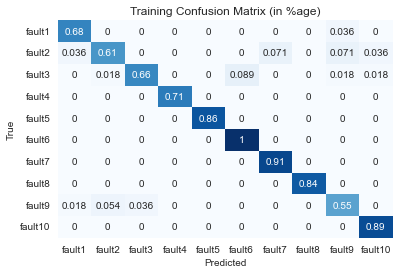

In [12]:
fault_type = ['fault1','fault2','fault3','fault4','fault5','fault6','fault7','fault8','fault9','fault10']
sns.heatmap(result/56, annot= True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()